In [1]:
data<-read.csv("/content/retail_sales_dataset (2).csv")

In [2]:
df <- read.csv("/content/retail_sales_dataset (2).csv", stringsAsFactors = FALSE)

In [6]:
# Check for missing values in each column
colSums(is.na(data))

# Output shows 0 missing values in all columns, so no imputation is needed



Transaction.ID             Date      Customer.ID           Gender 
               0                0                0                0 
             Age Product.Category         Quantity   Price.per.Unit 
               0                0                0                0 
    Total.Amount 
               0

In [ ]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)

In [ ]:
head(data)

,Transaction.ID,Date,Customer.ID,Gender,Age,Product.Category,Quantity,Price.per.Unit,Total.Amount
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>
1,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
2,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
3,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
4,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
5,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
6,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30


In [ ]:
str(data)

'data.frame':	1000 obs. of  9 variables:
 $ Transaction.ID  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Date            : chr  "2023-11-24" "2023-02-27" "2023-01-13" "2023-05-21" ...
 $ Customer.ID     : chr  "CUST001" "CUST002" "CUST003" "CUST004" ...
 $ Gender          : chr  "Male" "Female" "Male" "Male" ...
 $ Age             : int  34 26 50 37 30 45 46 30 63 52 ...
 $ Product.Category: chr  "Beauty" "Clothing" "Electronics" "Clothing" ...
 $ Quantity        : int  3 2 1 1 2 1 2 4 2 4 ...
 $ Price.per.Unit  : int  50 500 30 500 50 30 25 25 300 50 ...
 $ Total.Amount    : int  150 1000 30 500 100 30 50 100 600 200 ...


In [ ]:
summary(data)

 Transaction.ID       Date           Customer.ID           Gender         
 Min.   :   1.0   Length:1000        Length:1000        Length:1000       
 1st Qu.: 250.8   Class :character   Class :character   Class :character  
 Median : 500.5   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 500.5                                                           
 3rd Qu.: 750.2                                                           
 Max.   :1000.0                                                           
      Age        Product.Category      Quantity     Price.per.Unit 
 Min.   :18.00   Length:1000        Min.   :1.000   Min.   : 25.0  
 1st Qu.:29.00   Class :character   1st Qu.:1.000   1st Qu.: 30.0  
 Median :42.00   Mode  :character   Median :3.000   Median : 50.0  
 Mean   :41.39                      Mean   :2.514   Mean   :179.9  
 3rd Qu.:53.00                      3rd Qu.:4.000   3rd Qu.:300.0  
 Max.   :64.00                      Max.   :4.000   Max.   :500.0  

In [ ]:
names(data) <- tolower(gsub(" ", "_", names(data)))

In [ ]:
data$revenue[is.na(data$revenue)] <- median(data$revenue, na.rm = TRUE)

In [ ]:
names(data)

[1] "transaction.id"   "date"             "customer.id"      "gender"          
[5] "age"              "product.category" "quantity"         "price.per.unit"  
[9] "total.amount"

In [ ]:
sum(is.na(data$Category))

[1] 0

In [ ]:
# First convert to character (if not already)
data$product.category <- as.character(data$product.category)

# Then replace NAs with "Unknown"
data$product.category[is.na(data$product.category)] <- "Unknown"

In [ ]:
data <- data %>% distinct()

In [ ]:
data$date <- as.Date(data$date, format="%Y-%m-%d")  # Adjust format as needed"

In [ ]:

data <- data %>% filter(total.amount >= 0)

In [ ]:
data$total.amount <- as.numeric(data$total.amount)
data <- data %>% filter(total.amount >= 0)

In [ ]:
data$date<-as_datetime(data$date)

In [ ]:
install.packages("lubridate")
library(lubridate)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

data<-data %>%
  mutate(
  Revenue=quantity*price.per.unit,
  Month=floor_date(date,"month"),
  date=as.Date(date)
  )

In [ ]:
colSums(is.na(data))

transaction.id             date      customer.id           gender 
               0                0                0                0 
             age product.category         quantity   price.per.unit 
               0                0                0                0 
    total.amount          Revenue            Month 
               0                0                0

In [ ]:
data$Total_Amount<-with(data,ifelse(!is.na(Quantity) & !is.na(Price.per.Unit),
                                    Quantity*Price.per.Unit,
                                    Total_amount))

In [ ]:
data<-data[, !(names(data) %in% c("transaction.id"))]

In [ ]:
data

In [ ]:
names(data)

[1] "Date"             "Customer.ID"      "Gender"           "Age"             
[5] "Product.Category" "Quantity"         "Price.per.Unit"   "Total.Amount"    
[9] "Total_Amount"

In [ ]:
mean_age=mean(data$Age,na.rm=TRUE)
mean_age

[1] 41.392

In [ ]:

mean_Quantity=mean(data$Quantity,na.rm=TRUE)
mean_Quantity
data$Quantity[is.na(data$Quantity)]=mean_Quantity

[1] 2.514

In [ ]:
data$Age[is.na(data$Age)]=mean_age

In [ ]:
mean_price=mean(data$Price.per.Unit,na.rm=TRUE)

In [ ]:
mean_price

[1] 179.89

In [ ]:
data=data %>% mutate(Gender=ifelse(Gender=="Male",1,0))

In [ ]:
product_category=table(data$Product.Category)
product_category


     Beauty    Clothing Electronics 
        307         351         342 

In [ ]:
data$Category_encoded<-as.numeric(factor(data$Product.Category))
data<-data%>%select(-Product.Category)

In [ ]:
head(data)

,Date,Customer.ID,Gender,Age,Quantity,Price.per.Unit,Total.Amount,Total_Amount,Category_encoded
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,2023-11-24,CUST001,1,34,3,50,150,150,1
2,2023-02-27,CUST002,0,26,2,500,1000,1000,2
3,2023-01-13,CUST003,1,50,1,30,30,30,3
4,2023-05-21,CUST004,1,37,1,500,500,500,2
5,2023-05-06,CUST005,1,30,2,50,100,100,1
6,2023-04-25,CUST006,0,45,1,30,30,30,1


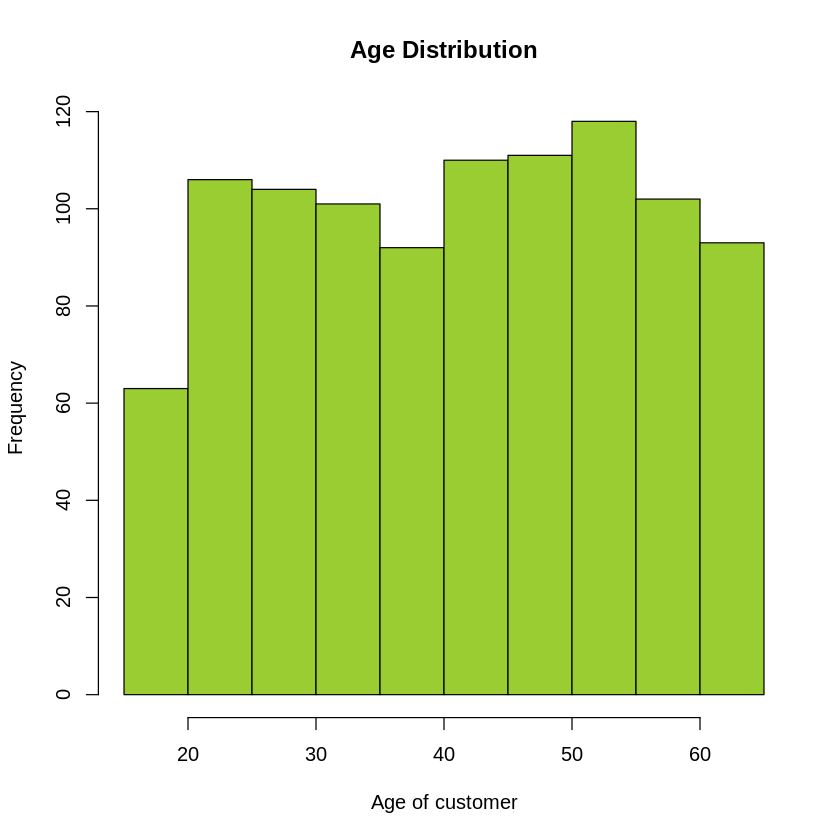

In [ ]:
hist(data$Age,col="yellow green",
     breaks=10,xlab="Age of customer",
     main="Age Distribution")

In [ ]:
#Load libraries
library(ggplot2)
library(readr)
library(dplyr)

#Load the dataset
data<-read.csv("/content/retail_sales_dataset.csv")

In [ ]:

names(data) <- make.names(names(data))



In [ ]:
#Calculate average spend per transaction by gender
avg_spend_gender <- data %>%
  group_by(Gender) %>%
  summarise(AveragePerTransaction = mean(Total.Amount, na.rm = TRUE))


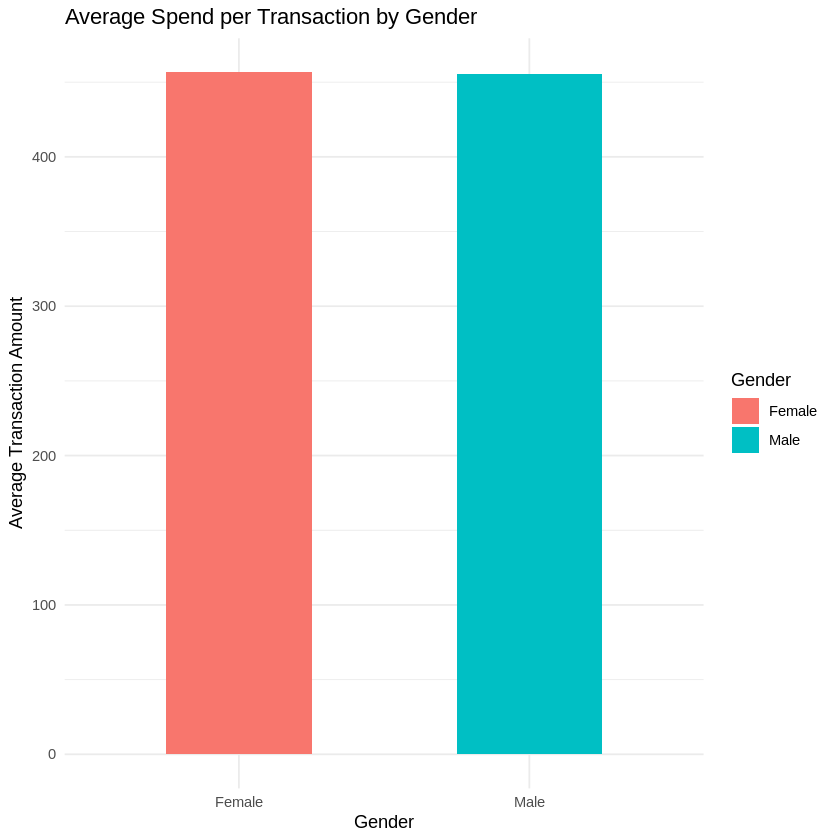

In [ ]:
#Plot
ggplot(avg_spend_gender, aes(x=Gender, y=AveragePerTransaction, fill=Gender)) +
  geom_bar(stat="identity", width=0.5) +
  labs(title = "Average Spend per Transaction by Gender",
       x = "Gender",
       y = "Average Transaction Amount") +
  theme_minimal()


In [ ]:
#Load necessary libraries
library(ggplot2)
library(readr)
library(dplyr)


In [ ]:
#Group by product category and calculate total sales
category_sales <- data %>%
  group_by(`Product.Category`) %>%
  summarise(TotalSales = sum(`Total.Amount`, na.rm = TRUE)) %>%
  arrange(desc(TotalSales))


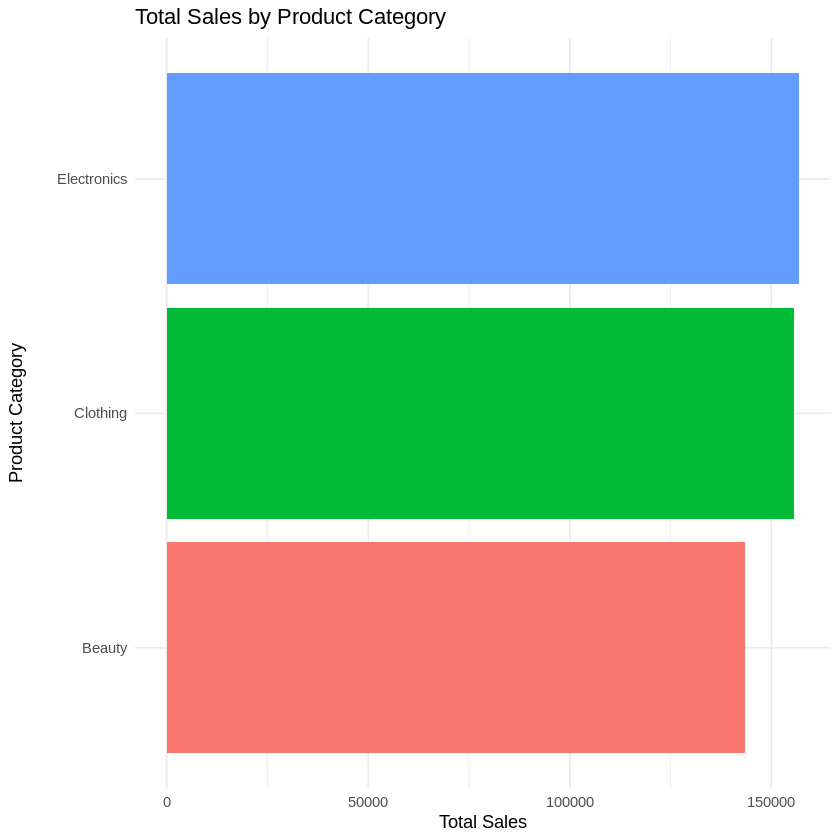

In [ ]:
#Bar plot of total sales by product category
ggplot(category_sales, aes(x = reorder(`Product.Category`, TotalSales), y = TotalSales, fill = `Product.Category`)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Total Sales by Product Category",
       x = "Product Category",
       y = "Total Sales") +
  theme_minimal() +
  theme(legend.position = "none")


In [ ]:
#Load necessary libraries
library(ggplot2)
library(readr)
library(dplyr)
library(lubridate)

In [ ]:
#Read the dataset
data<-read.csv("/content/retail_sales_dataset.csv")

In [ ]:
#Convert date column (assuming it's  named "Date") to proper Date format
data$Date<-as.Date(data$Date,format="%Y-%m-%d")

In [ ]:
#Add a 'Day' column(Monday,Tuesday,etc.)
data$Day<-weekdays(data$Date)

In [ ]:
#Order the days (so they appear Monday to Sunday)
ordered_days<-c("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
data$Day<-factor(data$Day,levels=ordered_days)

In [ ]:
#Group by day and summarize total sales
sales_by_day <- data %>%
  group_by(Day) %>%
  summarise(TotalSales = sum(Total.Amount, na.rm = TRUE))


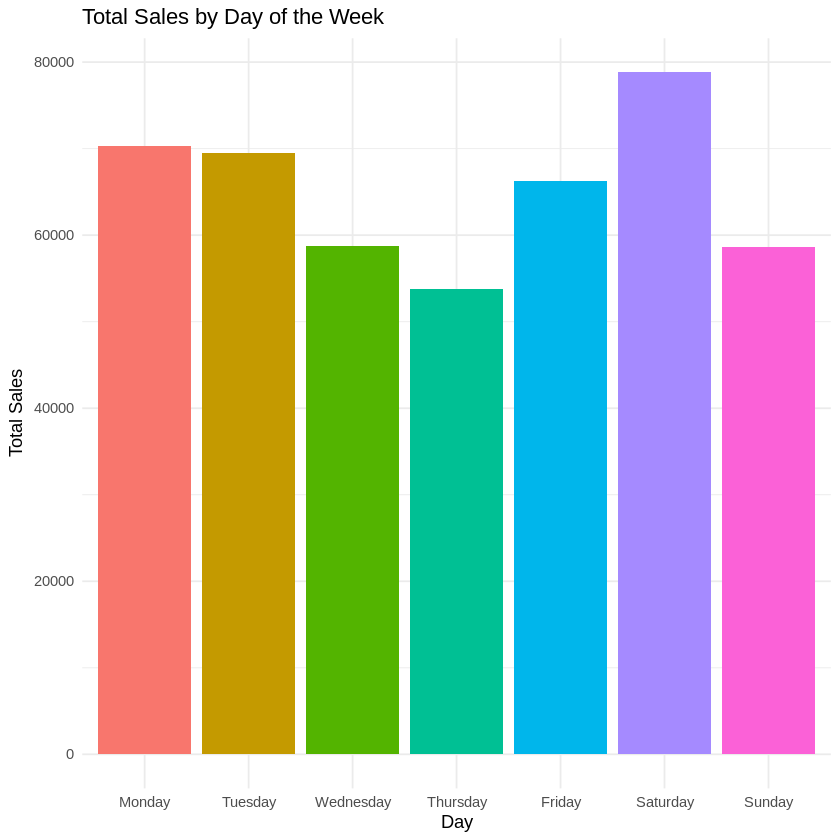

In [ ]:
#Plot
ggplot(sales_by_day,aes(x=Day,y=TotalSales,fill=Day)) +
  geom_bar(stat="identity") +
  labs(title="Total Sales by Day of the Week",
       x="Day",
       y="Total Sales") +
  theme_minimal() +
  theme(legend.position="none")